Amire szükséged lesz:
- Anaconda for Windows: https://www.continuum.io/downloads
- Jupyter Notebook: conda install jupyter (cmdlineban)
- Seaborn package: conda install seaborn
- Egyeb mas package: conda install [package name]
- Jupyter futtatása: jupyter notebook
- Uj projekt: File > New Notebook > Python 3
- Blokk futtatása: CTRL + Enter
- Adatok letöltése: http://www.bamosz.hu/letoltesek (Alapok kiválasztása: összes, Nettó eszközérték nem kell, periódust válaszd ki, elválasztó karakter TAB majd letöltés)

In [21]:
#Importing libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns

#Configuration for drawing plots
%matplotlib inline

In [22]:
# Data processing method
def processBamosz(f_in,f_out,sep="\t"):
    w = open(f_out, 'w')
    
    set = {1,2,4,5,6,7,8,9,10,11,12,13,14,15,16}
    headerset = {3}
    
    oldvals = []
    with open(f_in, 'r') as f:
        i = 0
        ncols = 0;
        for line in f:
            i = i+1
            line = line.replace(",",".")
            toks = line.split(sep);
            ll = len(oldvals)
            if i not in set:
                if (i in headerset):
                    w.write(line)
                elif ll == 0:
                    w.write(line)
                    oldvals = toks
                else:
                    newline = [toks[0]]
                    for j in range(1,ll):
                        oldval = oldvals[j];
                        if (toks[j] != ""): oldvals[j] = toks[j]
                        r = oldvals[j]
                        newline.append(str(r))
                    w.write(sep.join(newline))

        f.close()
    w.close()

In [23]:
# Processing and loading data
f_raw = "C:/Downloads/funds_20150101_20151116.csv"
f = f_raw + ".h"
processBamosz(f_raw, f, sep="\t")

# Loading processed data -- daily prices
data = pd.read_csv(f,  sep="\t", tupleize_cols=False, index_col=0, parse_dates=True, encoding='latin-1')
data = data.sort_index()
data.index.name = 'Date'
# Calculating daily log returns
returns = np.log(data[1:].reset_index()[data.columns]/data[:-1].reset_index()[data.columns])
returns.index = data[:-1].index
# Dropping funds with missing data (not available for the full period)
returns.dropna(axis=1, inplace=True)
print("Period: %s - %s " % (returns.index[0], returns.index[-1]))
print("Number of days: %s" % (returns.index[-1:] - returns.index[0])[0])
print("Number of trading days:", returns.shape[0])
print("Number of funds:", returns.shape[1])
returns.ix[:10,:2]

Period: 2015-01-05 00:00:00 - 2015-11-12 00:00:00 
Number of days: 311 days 00:00:00
Number of trading days: 227
Number of funds: 528


,Aberdeen Diversified Growth Alapok Alapja ?B?,Aberdeen Diversified Growth Alapok Alapja ?I?
Date,,
2015-01-05,-0.000721,-0.000619
2015-01-06,-0.005976,-0.005956
2015-01-07,0.000466,0.000487
2015-01-08,0.005206,0.005227
2015-01-09,0.001407,0.001428
2015-01-10,0.000000,0.000000
2015-01-11,0.000000,0.000000
2015-01-12,0.000135,0.000197
2015-01-13,0.000203,0.000224


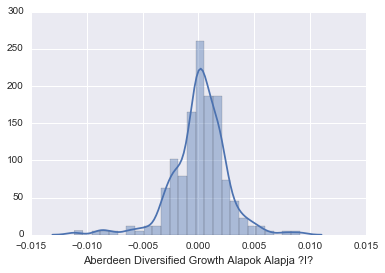

In [4]:
#Hozameloszlas egy alapra
sns.distplot(returns.ix[:,1])

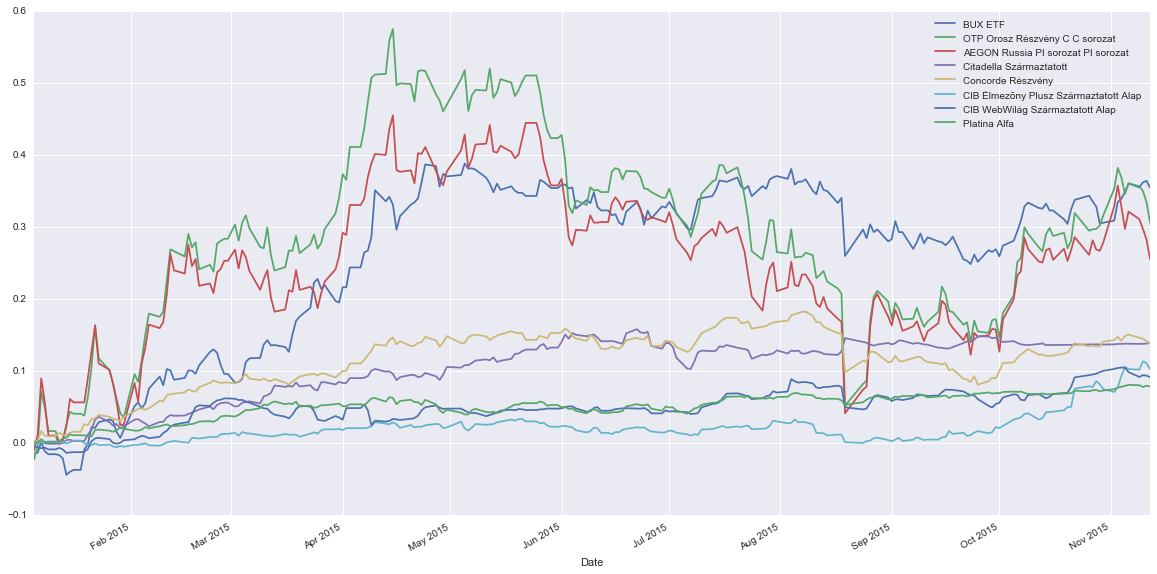

In [31]:
#Pelda a hozamidosor kirajzolasara (figyelve arra hogy logaritmikus hozamokkal szamolunk)
funds = ['BUX ETF','OTP Orosz Részvény C C sorozat','AEGON Russia PI sorozat PI sorozat','Citadella Származtatott','Concorde Részvény','CIB Élmezõny Plusz Származtatott Alap','CIB WebWilág Származtatott Alap','Platina Alfa']
(np.exp(returns[funds].cumsum())-1).plot(figsize=(20,10))

In [26]:
#Legmagasabb hozamu papirok
d = pd.DataFrame(data={"Return%":100*(np.exp(returns.sum())-1), "StDev%":returns.std()*100}, index=data.columns)
d['Sharpe'] = d['Return%'] / d['StDev%']
d = d.sort('Return%',ascending=False)[:100]
#Top10
d[:10]

C:\Python\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Return%,StDev%,Sharpe
BUX ETF,35.472539,1.163871,30.478068
Allianz Indexkövetõ Részvény,34.120017,1.155889,29.518430
Pioneer Magyar Indexkövetõ Részvény,32.804252,1.150869,28.503885
Erste Stock Hungary Indexkövetõ Részvény,32.479160,1.107757,29.319752
CIB Indexkövetõ,32.477535,1.163648,27.910108
OTP Orosz Részvény C C sorozat,30.570847,2.098310,14.569272
OTP Orosz Részvény B B sorozat,28.522619,1.950065,14.626500
OTP Orosz Részvény A A sorozat,27.756076,1.950399,14.230972
AEGON Russia PI sorozat PI sorozat,25.482648,2.101790,12.124258
AEGON RUSSIA P P sorozat,24.634231,2.102266,11.717944


In [27]:
# Alapok, aminek a hozama nagyobb mint 10%, de a napi szorasa kisebb mint 1%
d[(d["Return%"]>10) & (d["StDev%"] < 1)]

,Return%,StDev%,Sharpe
Citadella Származtatott,13.882402,0.415392,33.420035
OTP Omega Fejlett Piaci Részvény B B sorozat,13.864720,0.995517,13.927158
Concorde Részvény,13.751090,0.560849,24.518356
OTP Omega Fejlett Piaci Részvény A A sorozat,11.410021,0.877034,13.009779
CIB Élmezõny Plusz Származtatott Alap,10.215859,0.369839,27.622464


In [28]:
# Portfolio generalasi fuggvenyek
def weighted_portfolio(returns,ws):
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(ws/np.sum(ws))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    return mu, sigma

def random_portfolio(returns,max_sigma=2):
    # This recursion reduces outliers to keep plots pretty    
    mu, sigma = weighted_portfolio(returns,rand_weights(returns.shape[0]))
    if sigma > max_sigma: return random_portfolio(returns,max_sigma)
    return mu, sigma

def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def eq_weights(n):
    return [1.0 / n]*n

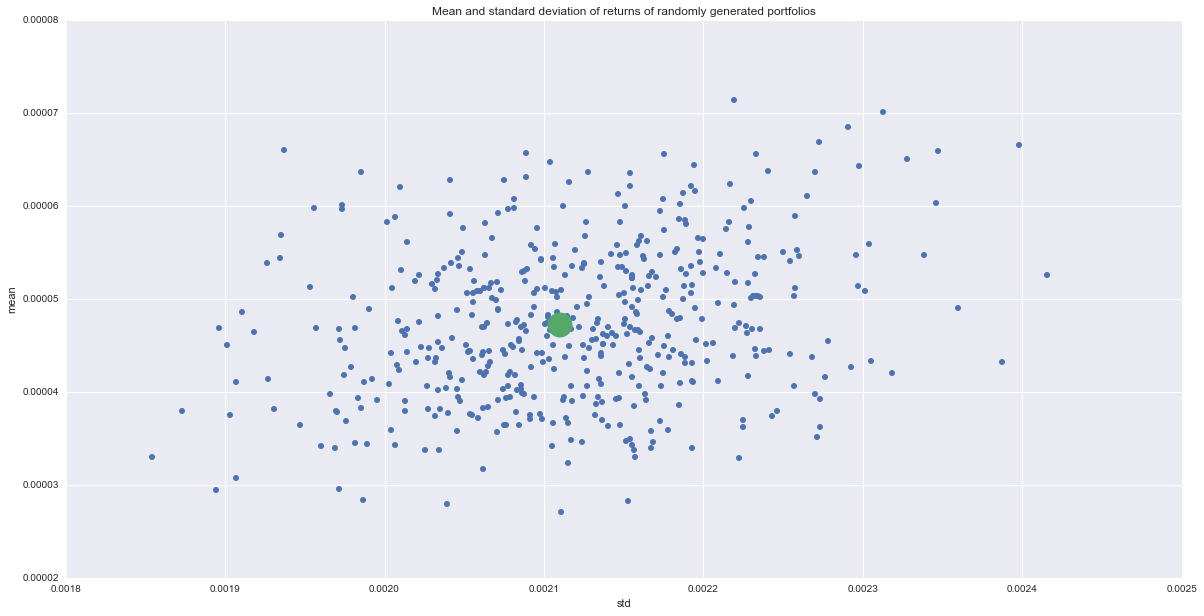

In [13]:
# Generating 500 randomly weighted portfolio
plt.figure(figsize=(20,10))
means, stds = np.column_stack([random_portfolio(returns.T,max_sigma=100) for _ in range(1,500)])
plt.plot(stds, means, 'o', markersize=6)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

# Drawing equally weighted portfolio
a = weighted_portfolio(returns.T, eq_weights(returns.shape[1]))
plt.plot(a[1], a[0], 'o', markersize=25)

ValueError: need more than 1 value to unpack

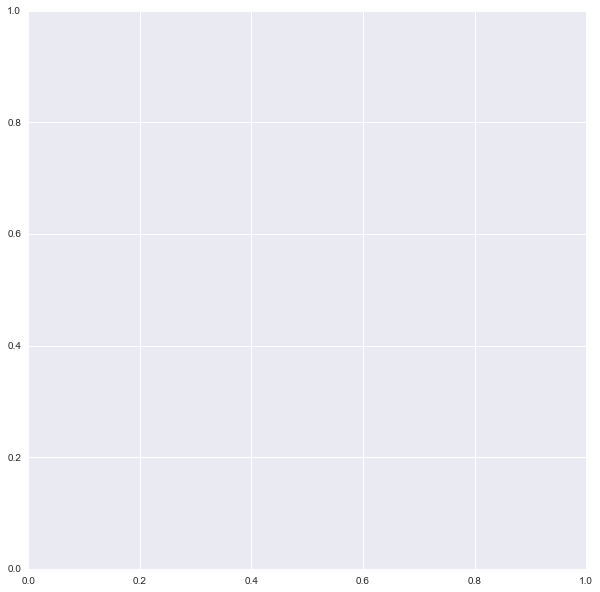

In [29]:
f, ax = plt.subplots(figsize=(10, 10))
p = sns.kdeplot(stds, means)

C:\Python\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


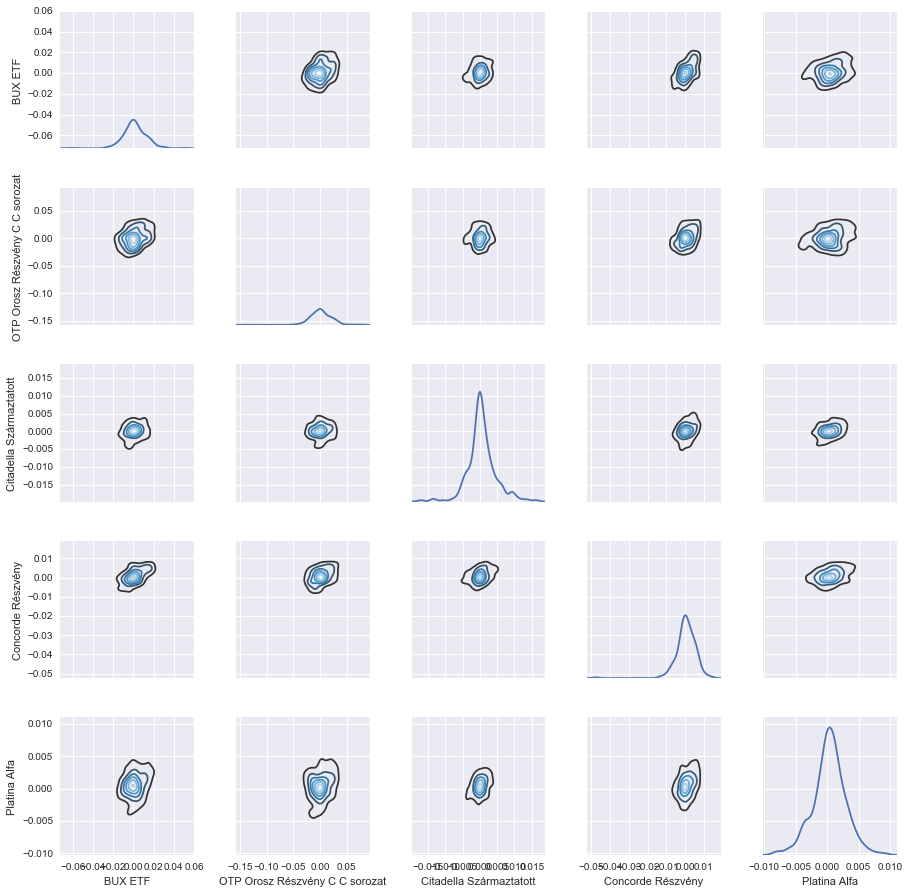

In [30]:
g = sns.PairGrid(returns[['BUX ETF','OTP Orosz Részvény C C sorozat','Citadella Származtatott','Concorde Részvény','Platina Alfa']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

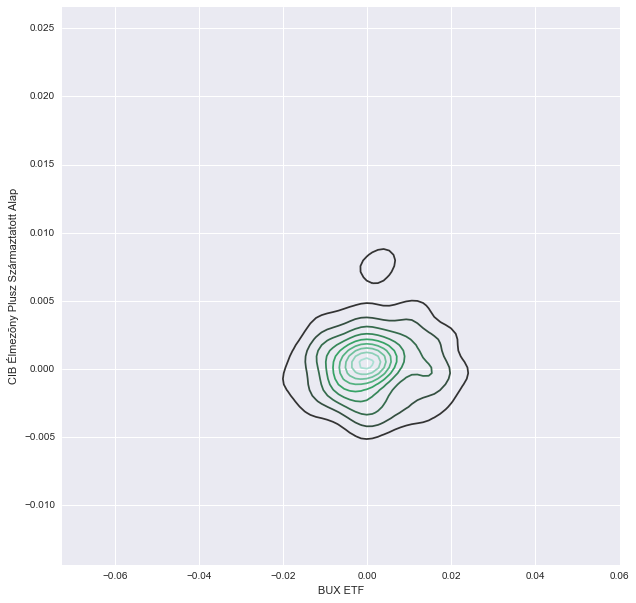

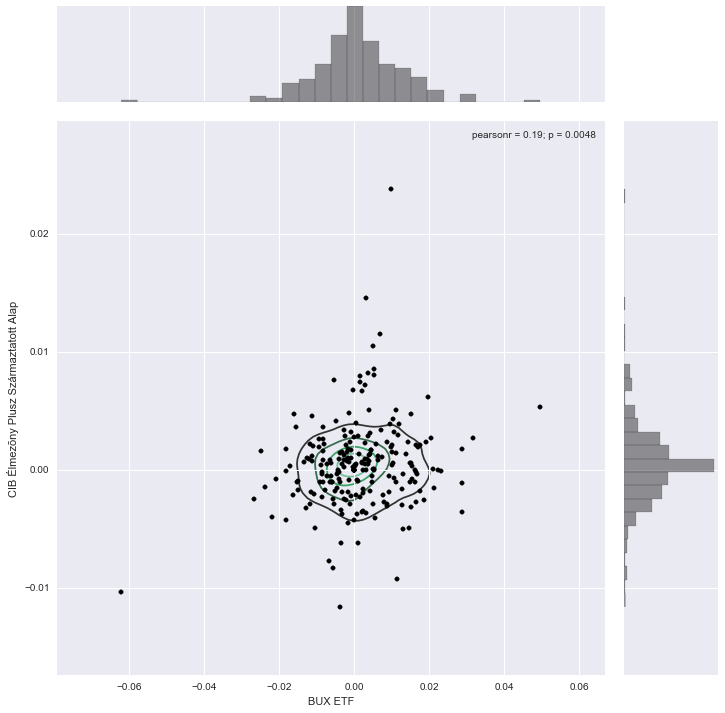

In [9]:
x = returns['BUX ETF']
y = returns['CIB Élmezõny Plusz Származtatott Alap']
f, ax = plt.subplots(figsize=(10, 10))
p = sns.kdeplot(x,y)
a = sns.jointplot(x,y, color="k", size=10).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

C:\Python\Anaconda3\lib\site-packages\seaborn\categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
C:\Python\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


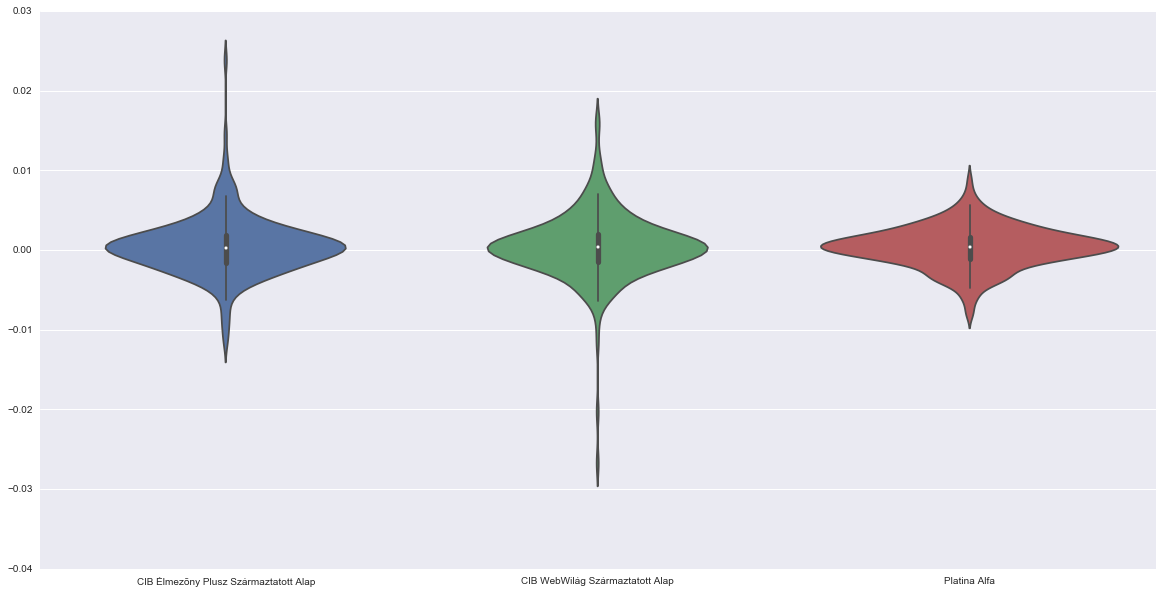

In [35]:
plt.subplots(figsize=(20, 10))
#sns.set_style("whitegrid")
sns.violinplot(x=returns[funds[-3:]])
#sns.boxplot(x=returns[funds[-3:]])

Innentől te jössz... :)